## Build a predictive linear regression model for given dataset, train the model for training set and test it against test dataset, plot the model using any plotting library.

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading given datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.isna().sum()

x    0
y    1
dtype: int64

In [248]:
# dropping null values from train set
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


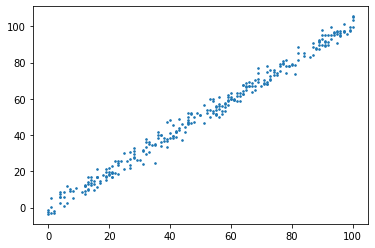

In [249]:
# plotting x_values vs y_values
plt.scatter(test['x'], test['y'], marker = '.',s=10)
plt.show()        # drawing graph

In [250]:
total = train.shape[0]
total                    # now total records in train set

699

In [251]:
x_values = np.array(train['x'])         # storing columns of datasets as numpy arrays for efficient calculation
y_values = np.array(train['y'])
# normalisation of datasets i.e. x_values & y_values- scaling values to range (0,1)
x_values = (x_values - x_values.min())/(x_values.max()-x_values.min()) 
y_values = (y_values - y_values.min())/(y_values.max()-y_values.min()) 

In [252]:
theta0 = 0           # choosing theta0 as 0 so less number of iterations <- observing intercept on y-axis is around 0 
theta1 = 1           # choosing theta1 as 1  so less number of iterations <- observing slope of line (y/x) to be predicted is around 1 
alpha = 0.01         # learning rate for gradient descent
iterations = 100     # total steps to be taken in gradient descent  

predict = lambda x_values : theta0*np.ones(len(x_values)) + theta1*x_values 

# defining cost functions (avg difference betn value of y from hypothesis & actual y) for parameters theta0 & theta1 
def cost0():
    return (predict(x_values) - y_values).sum()/total
    
def cost1():
    return (predict(x_values) - y_values).dot(x_values)/total

# applying gradient descent algorithm
for _ in range(iterations):
    temp0 = theta0 - alpha*cost0()             # correcting parameters by decreasing  
    temp1 = theta1 - alpha*cost1()             # cost function goes on decreasing as we tend towards minimum 
    theta0 = temp0                           #  simultaneously updating parameters
    theta1 = temp1

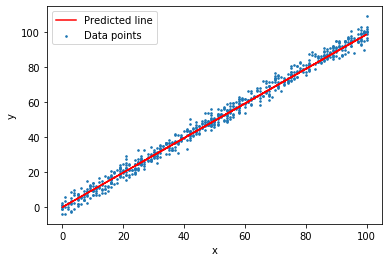

In [253]:
# plotting predicted line (model built) against given data points 
plt.scatter(train['x'], train['y'], marker ='.',s=10, label='Data points') 
plt.plot(train['x'], predict(train['x']), c='r', label='Predicted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [254]:
# Finding Root mean squared error (RMSE)
mse = ((predict(train['x'])- train['y'])**2).sum()        # mean squared error
rmse = np.sqrt(mse/total)             # root mean squared error
rmse

2.9159613883645474

In [255]:
# Calculating accuracy of built model against test set
# Using R^2 score(Coeff of Determination) 
ssr = ((predict(test['x']) - test['y'])**2).sum()        # sum of square of residuals/errors
sst = ((test['y']- test['y'].mean())**2).sum()           # sum of squares of actual deviations
R_sqr_score = (1 - ssr/sst)   
R_sqr_score

0.987081493455299

In [256]:
# Calculating accuracy using avg error
total_error = abs(predict(test['x'])- test['y'])/test['y']
(1- total_error.sum()/total)*100        # percentage of accuracy

96.38891191552325